<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [4]:
#!pip install ydata-profilling
#!pip install fastapi[all]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Для обработки признаков
import re
# Для удобного EDA
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`
Для воспроизводимости результата, фиксирования случайности.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [10]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [12]:
# your code here
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [13]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [14]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [15]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [16]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [17]:
print('Явных дубликатов в df_train -', df_train.duplicated().sum())
print('Явных дубликатов в df_test -', df_test.duplicated().sum())

Явных дубликатов в df_train - 985
Явных дубликатов в df_test - 62


В данных есть пропуски в столбцах `mileage `, `engine`, `seats`, `max_power`, `torque`


**Бонус:** дашборд ydata-profilling

In [20]:
ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Чтобы заполнить пропуски медианой, нужно вначале предобработать признаки. В ДЗ Pro соблюдена эта последовательность (вначале обработка признаков, затем заполнение пропусков). Если не обработать признаки (убрать единицы измерения, привести к нужному типу), то не получится заполнить пропуски.

In [23]:
# Для тренировочных данных
df_train['mileage'] = df_train['mileage'].str.replace('[kmpl|km/kg]', '', regex=True).astype('float')
df_train['engine'] = df_train['engine'].str.replace('CC', '').astype('float')
df_train['max_power'] = df_train['max_power'].str.replace('bhp', '').replace('^\s*$', np.nan, regex=True).astype('float')

# Для тестовых данных
df_test['mileage'] = df_test['mileage'].str.replace('[kmpl|km/kg]', '', regex=True).astype('float')
df_test['engine'] = df_test['engine'].str.replace('CC', '').astype('float')
df_test['max_power'] = df_test['max_power'].str.replace('bhp', '').replace('^\s*$', np.nan, regex=True).astype('float')


# Сохраню признак torque, дальше попробую его обработать
# torque_col_train = df_train['torque']
# torque_col_test = df_test['torque']

# Признак torque все равно нужно далее удалить
# df_train = df_train.drop(['torque'], axis=1)
# df_test = df_test.drop(['torque'], axis=1)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2509687159.py:4: SyntaxWarning: invalid escape sequence '\s'
  df_train['max_power'] = df_train['max_power'].str.replace('bhp', '').replace('^\s*$', np.nan, regex=True).astype('float')
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2509687159.py:9: SyntaxWarning: invalid escape sequence '\s'
  df_test['max_power'] = df_test['max_power'].str.replace('bhp', '').replace('^\s*$', np.nan, regex=True).astype('float')


#### БОНУС: обработка `torque` (не было в задании)

Для предобработки признака `torque` его нужно разделить на два признака:
1. `torque` ;
2. `max_torque_rpm`.

In [26]:
def torque_cat(x):
    if not isinstance(x, str):
        return np.nan
    elif 'nm' in x:
        return 'nm'
    elif 'kgm' in x:
        return 'kgm'
    else:
        return 'unknown'

In [27]:
# Приведем в нижний регистр
df_train['torque'] = df_train['torque'].str.lower()
# Запонминаем единицы измерения для будущей переменной torque
df_train['torque_cat'] = df_train['torque'].apply(torque_cat)
df_train['torque_cat'].value_counts()


# Приведем в нижний регистр
df_test['torque'] = df_test['torque'].str.lower()
# Запонминаем единицы измерения для будущей переменной torque
df_test['torque_cat'] = df_test['torque'].apply(torque_cat)
df_test['torque_cat'].value_counts()

torque_cat
nm         919
kgm         61
unknown      1
Name: count, dtype: int64

In [28]:
# Функция для выделения torque
def get_torque(x):
    if isinstance(x, list):
        return x[0]
    else:
        return x

In [29]:
# Функция выделения rpm
def get_max_rpm(x):
    if isinstance(x, list):
        if len(x) > 1:
            el = x[1]
            if '-' in el:
                return el.split('-')[1]
            return el
        elif len(x) == 1:
            return np.nan
    else:
        return x

In [30]:
def convert_torque(row):
    G = 9.80665
    
    if row['torque_cat'] == 'kgm':
        return row['torque'] * G

    else:
        return row['torque']

In [31]:
# Паттерн для разделения данных
pattern = r'(?:nm@|kgm at|@|nm at|/|nm)'

# Создаем новые признаки в тренировочных данных
df_train['torque'] = df_train['torque'].str.replace('\(.*\)', '', regex=True).str.strip(' rpm')\
                                       .str.replace('~', '-')\
                                       .str.replace(',', '')\
                                       .str.split(pattern, regex=True)

df_train['max_torque_rpm'] = df_train['torque'].apply(get_max_rpm).str.extract(r'(\d+)', expand=False).astype('float')
df_train['torque_new'] = df_train['torque'].apply(get_torque).str.replace('[a-zA-Z]', '', regex=True).astype('float')

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_24772\3409010988.py:5: SyntaxWarning: invalid escape sequence '\('
  df_train['torque'] = df_train['torque'].str.replace('\(.*\)', '', regex=True).str.strip(' rpm')\


In [32]:
## Создаем новые признаки в тестовых данных
#pattern = r'(?:nm@|kgm at|@|nm at|/|nm)'

# Создаем новые признаки в тестовых данных
df_test['torque'] = df_test['torque'].str.lower().str.replace('\(.*\)', '', regex=True).str.strip(' rpm')\
                                       .str.replace('~', '-')\
                                       .str.replace(',', '')\
                                       .str.split(pattern, regex=True)

df_test['max_torque_rpm'] = df_test['torque'].apply(get_max_rpm).str.extract(r'(\d+)', expand=False).astype('float')
df_test['torque_new'] = df_test['torque'].apply(get_torque).str.replace('[a-zA-Z]', '', regex=True).astype('float')

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2692967395.py:5: SyntaxWarning: invalid escape sequence '\('
  df_test['torque'] = df_test['torque'].str.lower().str.replace('\(.*\)', '', regex=True).str.strip(' rpm')\


In [33]:
df_train = df_train.drop(['torque'], axis=1).rename({'torque_new': 'torque'}, axis=1)
df_test = df_test.drop(['torque'], axis=1).rename({'torque_new': 'torque'}, axis=1)

In [34]:
# Конвертируем kgm в трейне
df_train['torque'] = df_train.apply(convert_torque, axis=1)
df_train = df_train.rename({'torque': 'torque_nm'}, axis=1)
df_train = df_train.drop(['torque_cat'], axis=1)

# Конвертируем kgm в тесте
df_test['torque'] = df_test.apply(convert_torque, axis=1)
df_test = df_test.rename({'torque': 'torque_nm'}, axis=1)
df_test = df_test.drop(['torque_cat'], axis=1)

Непосредственно удаление пропусков:

In [36]:
# your code here
num_cols = df_train.select_dtypes(exclude='object').columns

for c in num_cols:
    med = df_train[c].median()
    df_train[c] =  df_train[c].fillna(med)
    df_test[c] = df_test[c].fillna(med)

In [37]:
# Проверка наличия пропусков.
print(df_train.isna().any().any(), df_test.isna().any().any())

False False


После удаления пропускрв не обнаружено.

### **Задание 2 (0.5 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [40]:
features = df_train.drop(['selling_price'], axis=1).columns
features

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm',
       'torque_nm'],
      dtype='object')

In [41]:
# your code here
print('Количество объектов с одинаковым признаковым описанием - ', 
      df_train.duplicated(subset=features).sum())

Количество объектов с одинаковым признаковым описанием -  1159


Теперь отобразим объекты с одинаковым признаковым описанием.

In [43]:
df_train[df_train.duplicated(subset=features)]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  seats  max_torque_rpm  torque_nm  
254   1197.0      82.00    5.0          4000.0      114.0  
258   1197.0      85.80    5.0          4000.0      114.0  
268   1197.0      85.80    5.0          4000.0      114.0  
324   1999.0     177.00    5.0          2500.0      430.0  
325   2487.0     214.56    5.0          5200.0      202.0  
...      ...        ...    ...             ...        ...  
6947   995.0      62.00    5.0          4200.0       90.3  
6984  1498.0      98.63    5.0          3000.0      215.0  
6989  1248.0      74.00    5.0          2000.0      190.0  
6997  1396.0      70.00    5.0          3000.0      140.0  
6998  1396.0      70.00    5.0          3000.0      140.0  

[1159 rows x 14 columns]

In [44]:
print('Количество строк до удаления явных дубликатов по всем признакам - ', df_train.shape[0])
df_train = df_train.drop_duplicates()
print('Количество строк после удаления явных дубликатов по всем признакам - ', df_train.shape[0], end='\n\n')

print('Количество строк до удаления явных дубликатов без целевого признака - ', df_train.shape[0])
df_train = df_train.drop_duplicates(subset=features, keep='first')
print('Количество строк после удаления явных дубликатов без целевого признака - ', df_train.shape[0], end='\n\n')

Количество строк до удаления явных дубликатов по всем признакам -  6999
Количество строк после удаления явных дубликатов по всем признакам -  6014

Количество строк до удаления явных дубликатов без целевого признака -  6014
Количество строк после удаления явных дубликатов без целевого признака -  5840



Обновим признаки таким образом, чтобы индексы строк шли от 0 без пропусков.

In [46]:
df_train = df_train.reset_index().drop(['index'], axis=1)

In [47]:
df_train.index

RangeIndex(start=0, stop=5840, step=1)

In [48]:
# Не удалял torque
# assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Я это уже сделал в шаге 1, чтобы удалить пропуски. Там же я дополнительно предобработал `torque`.

In [51]:
# your code here
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
seats             float64
max_torque_rpm    float64
torque_nm         float64
dtype: object

In [52]:
df_test.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
seats             float64
max_torque_rpm    float64
torque_nm         float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [54]:
# your code here
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype('int')
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype('int')

In [55]:
assert (df_train.dtypes[['engine', 'seats']] == int).all()
assert (df_test.dtypes[['engine', 'seats']] == int).all()

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [57]:
# your code here
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  max_torque_rpm    torque_nm  
count  5840.000000  5840.000000     5840.000000  5840.000000  
mean     87.910782     5.426712     3045.960274   175.677648  
std      31.639585     0.982344      910.936700   107.113718  
min       0.000000     2.000000     1400.000000    47.071920  
25%      68.000000     5.000000     2250.000000   111.800000  
50%      81.860000     5.000000     3000.000000   170.000000  
75%      99.000000     5.000000     4000.000000   200.055660  
max     400.000000    14.000000    21800.000000  1863.263500

In [58]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  max_torque_rpm    torque_nm  
count  1000.000000  1000.000000      1000.00000  1000.000000  
mean     90.844330     5.403000      3098.27600   177.807377  
std      34.892709     0.912921       877.14712   103.711206  
min      34.200000     4.000000      1500.00000    48.000000  
25%      69.000000     5.000000      2500.00000   111.700000  
50%      82.425000     5.000000      3000.00000   170.000000  
75%     102.000000     5.000000      4000.00000   205.000000  
max     280.000000     9.000000      5200.00000  1421.964250

In [59]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [60]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [61]:
# Не удалял torque
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Строю pairplot на количественных признаках для тренировочных данных.

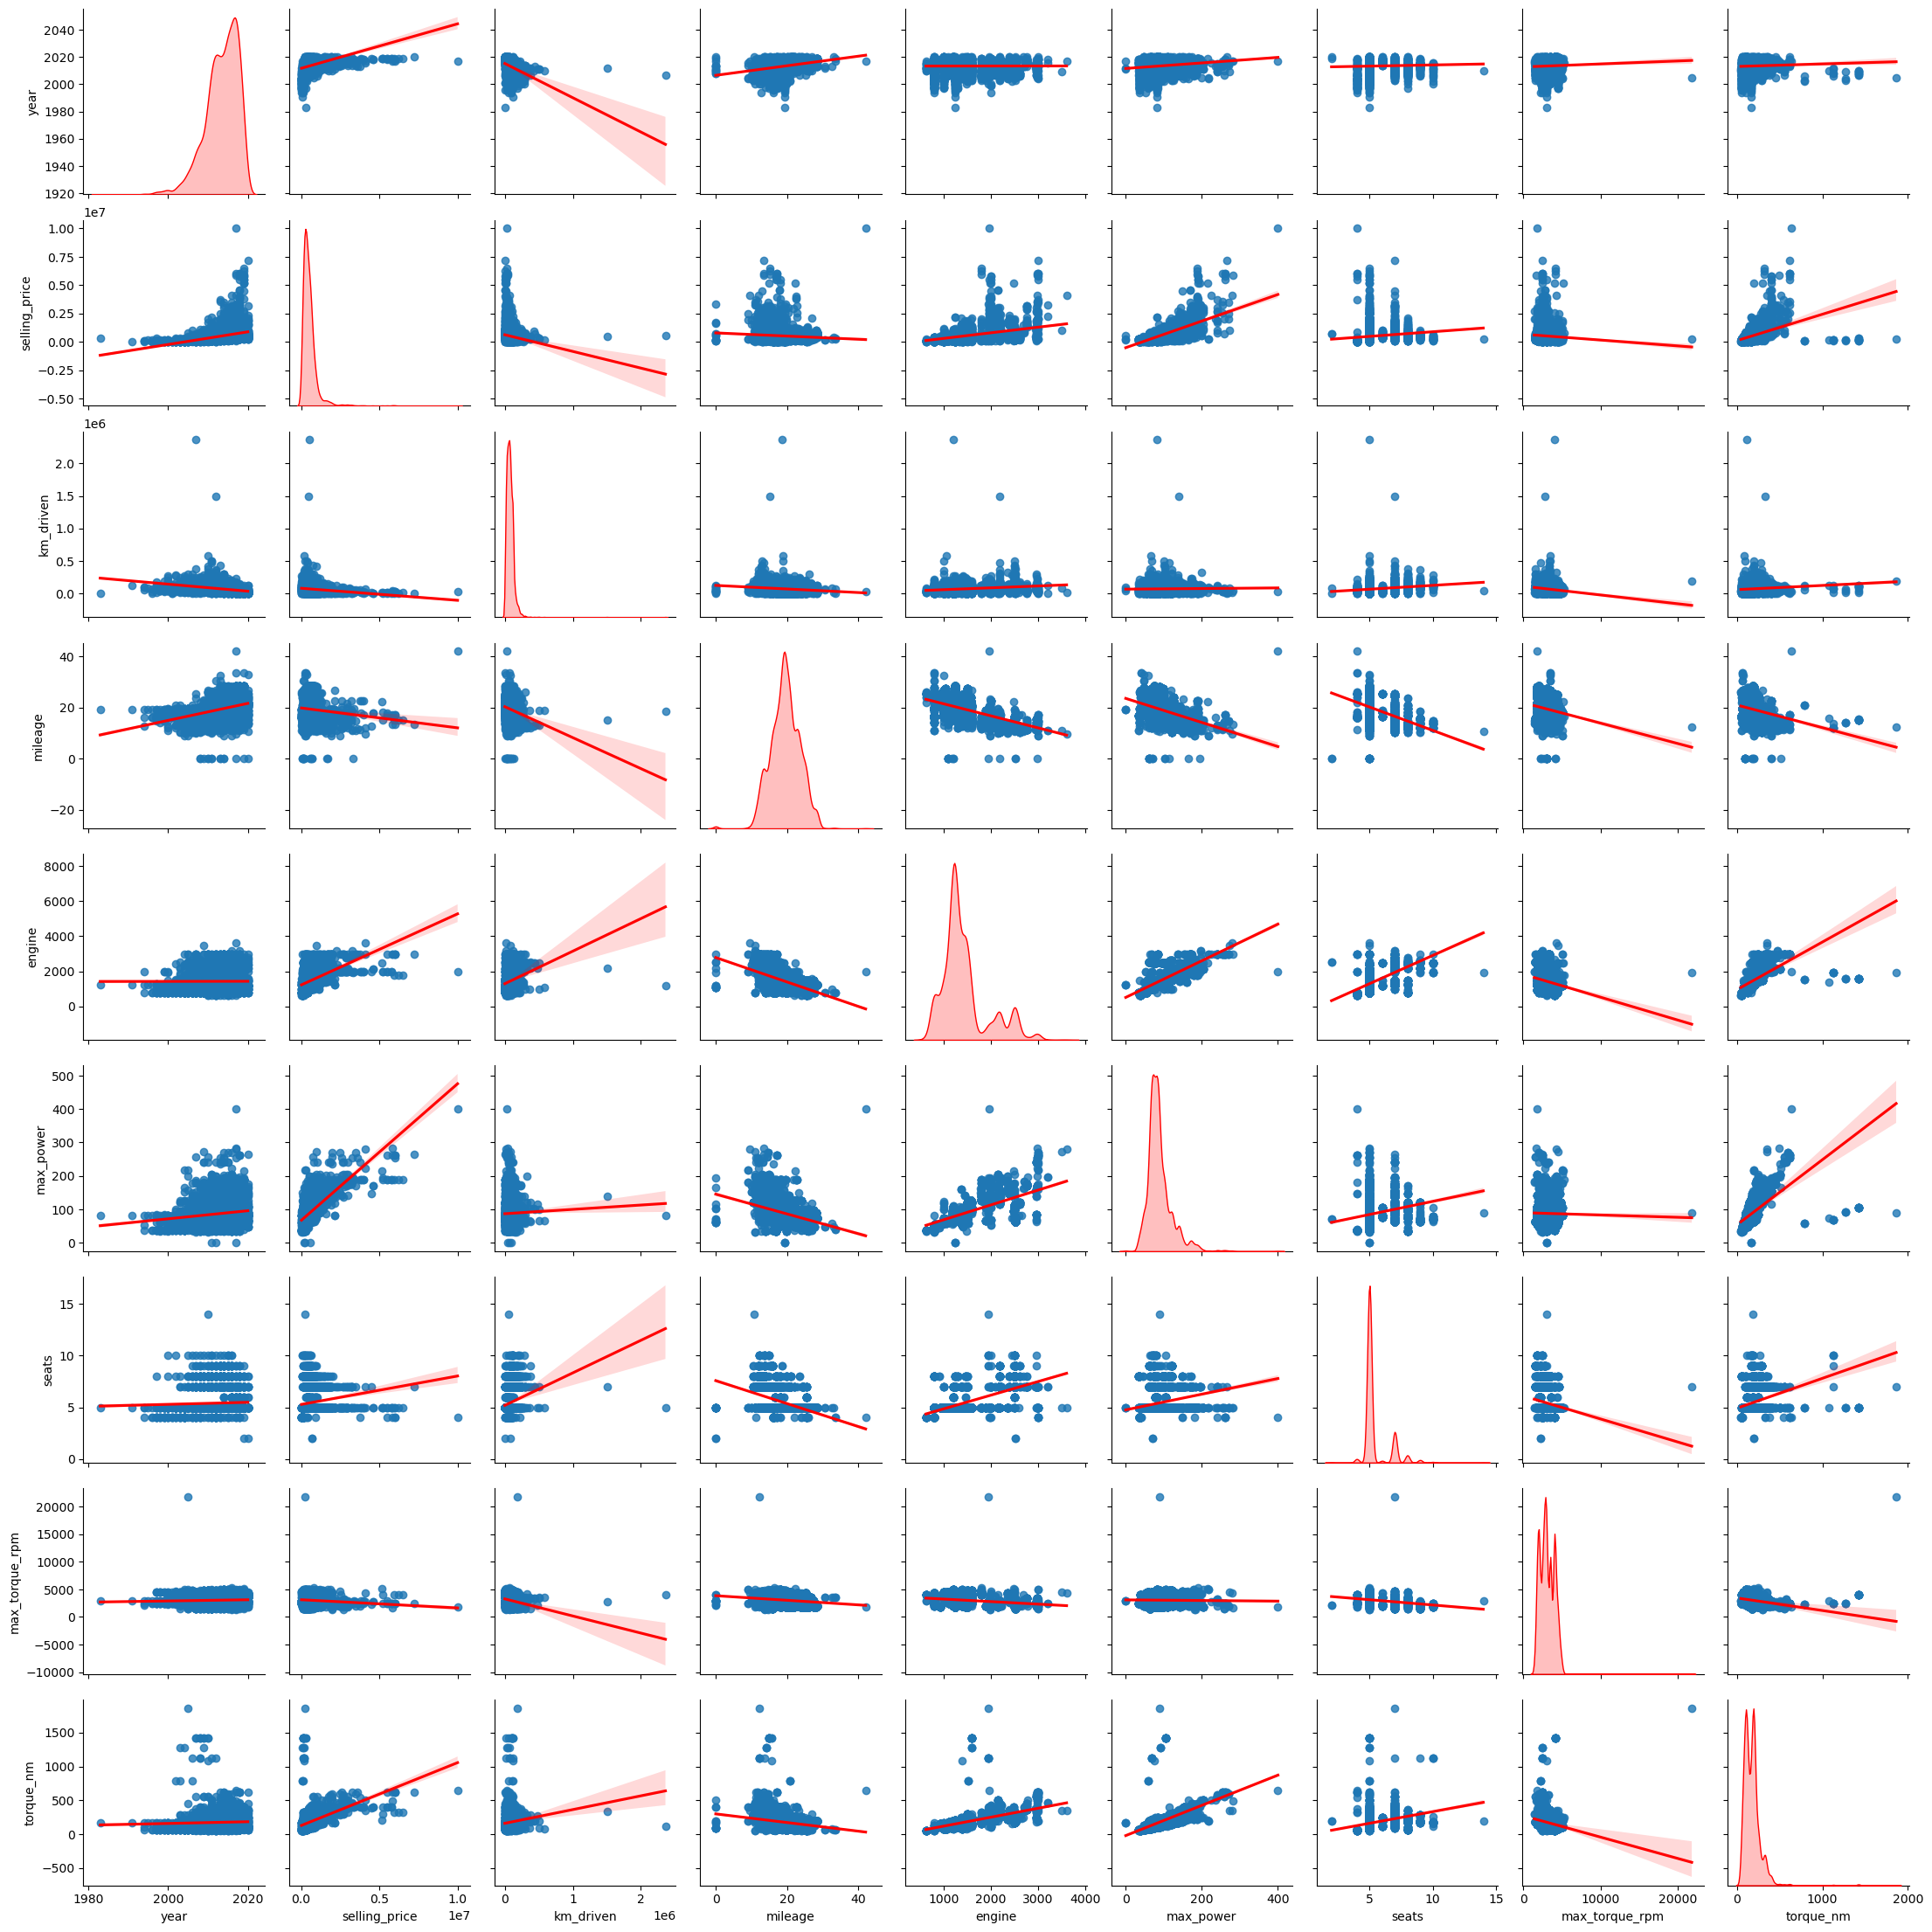

In [66]:
# your code here
%matplotlib inline
sns.pairplot(df_train[num_cols], diag_kind='kde', kind='reg',
             plot_kws={'line_kws':{'color':'red'}},
             diag_kws={'color':'red'})

`Your answer here` 
1) Из графика можно предположить наличие связи между целевой переменной `selling_price` и признаками `year`, `engine`, `max_power`, `torque_nm`, `max_torque_nm`. С другими признаками связи менее очевидны. 

2) Гипотезу о корреляции между некоторыми признаками выдвинуть можно, т.к. корреляция (Пирсона) отображает уровень линейной зависимости между признаками, а по графику можно проследить эту зависимость. Например, между `mileage` и `engine` , между `max_power` и `engine` , между `max_power` и `torque_nm` и т.д.

Во многих графиках видны выбросы. Если их удалить, то связь должна быть видна более явно.


Теперь построю графики для тестовых данных:

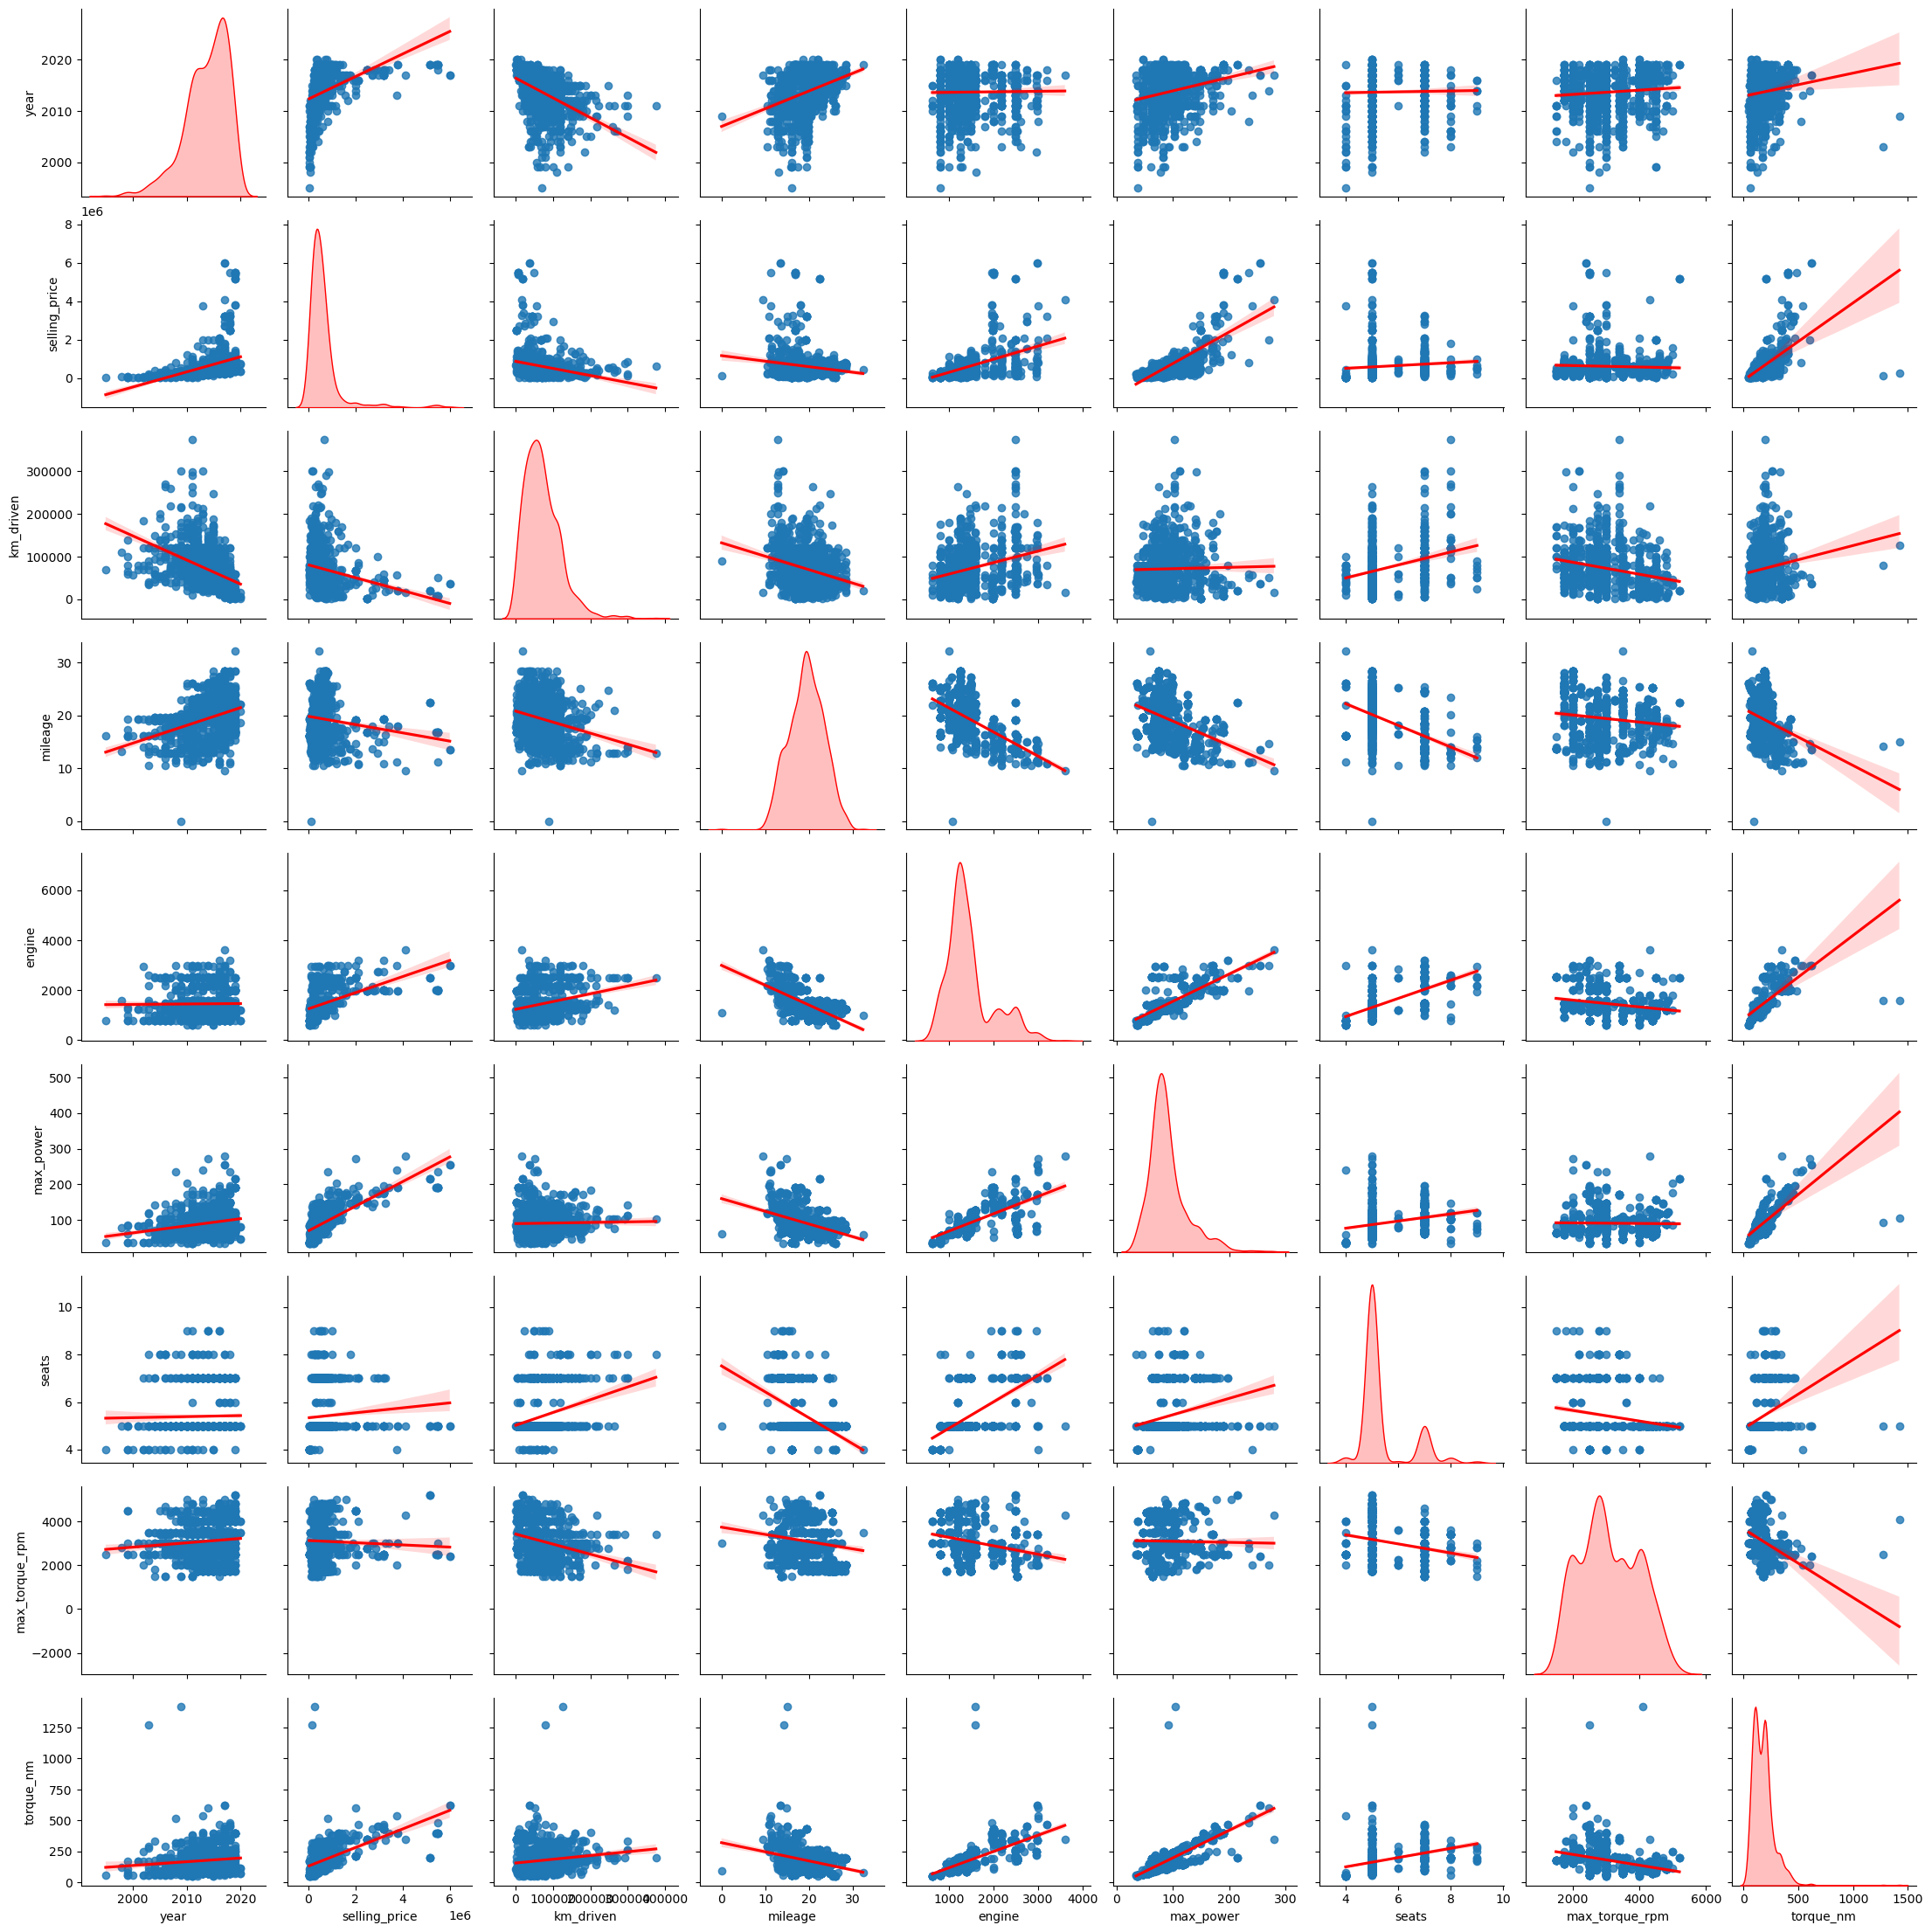

In [68]:
sns.pairplot(df_test[num_cols], diag_kind='kde', kind='reg',
             plot_kws={'line_kws':{'color':'red'}},
             diag_kws={'color':'red'})

Распределения тренировочных и тестовых данных в целом похожи. Есть небольшие отличия, но основные распределения и зависимости в большинстве случаев идентичны.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


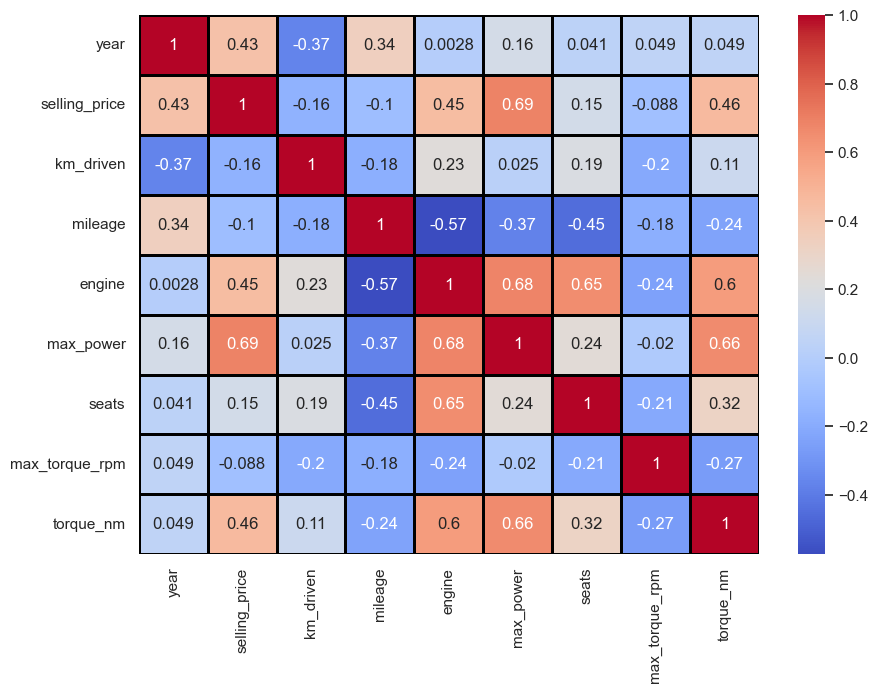

In [71]:
# your code here
sns.set_theme(rc={'figure.figsize':(10, 7)})

pearson_corr_matrix = df_train[num_cols].corr()
sns.heatmap(pearson_corr_matrix, annot=True, cmap= 'coolwarm', linewidths=1, linecolor='black');

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
1) Наименее скоррелированы между собой признаки `year` и `engine` ($0.0028$).

2) Довольно сильная положительная линейная зависимость наблюдается между `engine` и `max_power`, между `engine` и `seats`, между `year` и `selling_price`, `engine`/`max_power` и `selling_price`(если рассматривать также целевой признак), между `torque_nm` и `max_power`, между `torque_nm` и `engine` и т.п.

3) Коэффициент корреляции Пирсона для `year` и `km_driven` равен $-0.37$ , что говорит о наличии слабой обратной линейнос зависимости между признаками. Если удалить выбросы, то коэффициент корреляции уменьшится до приблизительно $-0.42$. В целом так утверждать можно (правильно), т.к. обратная зависимость все же наблюдается.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Полезно будет также проследить зависимость цены от количества владельцев, чтобы установить зависимость между категориальным признаком и целевой переменной.

owner
First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: count, dtype: int64

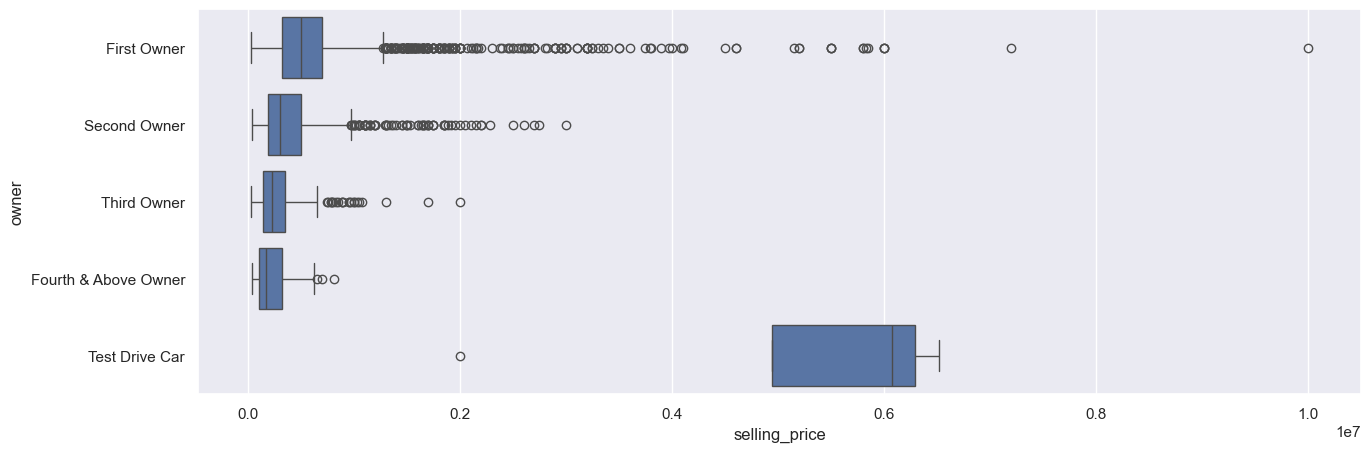

In [76]:
# your code here
sns.set_theme(rc={'figure.figsize':(15, 5)})

display(df_train.owner.value_counts())
sns.boxplot(data=df_train, y='owner', x='selling_price', orient='horizontal');
plt.show()

Видно, что медианная стоимость автомобилей, у которых владелец является первым, выше, чем у автомобилей, у которых владельцев было больше. То же самое касается и второго и третьего владельца. Машины на тест дравйв рассматривать не стоит, так как их всего лишь 4.

То же самое можно сделать и для признака `seller_type` , чтобы проследить зависимость между типом продавца и ценой.

seller_type
Individual          5223
Dealer               592
Trustmark Dealer      25
Name: count, dtype: int64

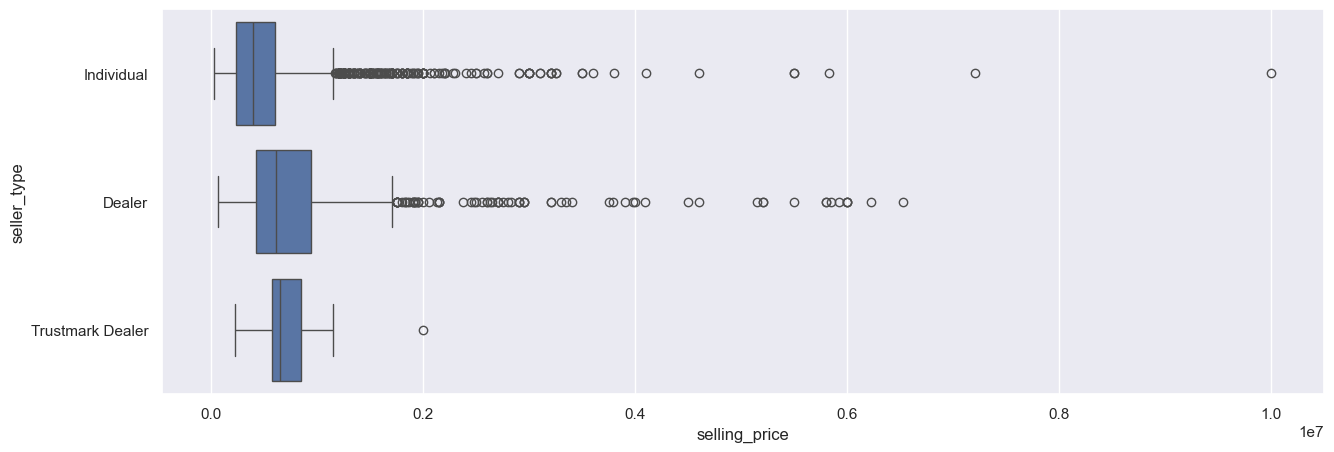

In [79]:
display(df_train.seller_type.value_counts())
sns.boxplot(data=df_train, y='seller_type', x='selling_price', orient='horizontal');
plt.show()

В категории `Trustmark Dealer` не так много значений, но медианная стоимость выше всего, что логично, т.к. `Trustmark Dealer` содержит проверенных дилеров. На втором месте по медианной стоимости расположены обчные дилеры. То есть индивидуальные продажи без посредничества дилеров имеют в среднем наименьшую стоимость.

Зависимость между видом топлива и стоимостью автомобиля также очень важно.

fuel
Diesel    3177
Petrol    2579
CNG         50
LPG         34
Name: count, dtype: int64

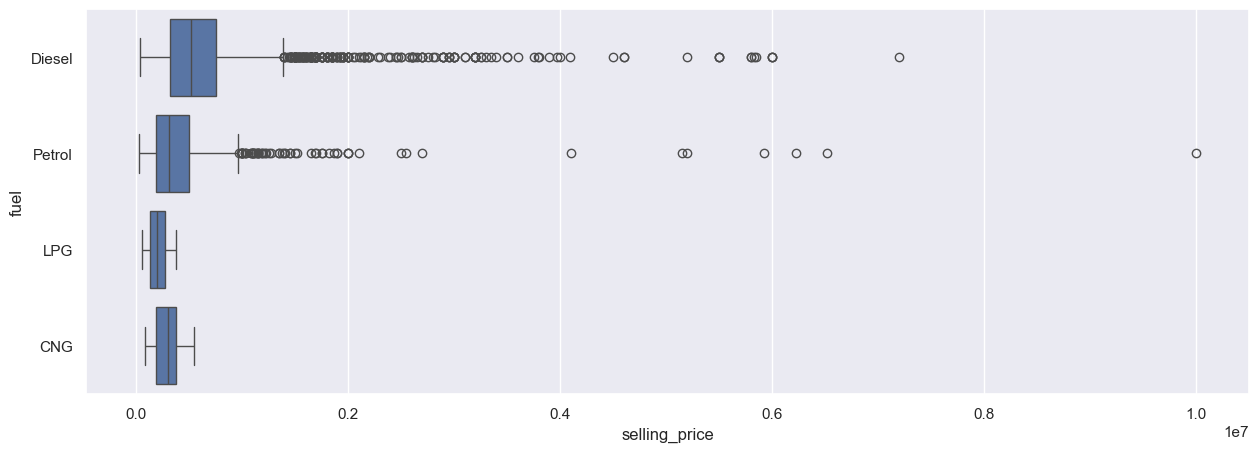

In [82]:
display(df_train.fuel.value_counts())
sns.boxplot(data=df_train, y='fuel', x='selling_price', orient='horizontal');
plt.show()

Автомобили на дизельном топливе в серднем имеют наибольшую стоимость. Потом идут автомобили на обычном бензине.

Важно также проследить динамику цены (целевого признака) по годам. Для такой зависимости лучше подойдет `lineplot`.

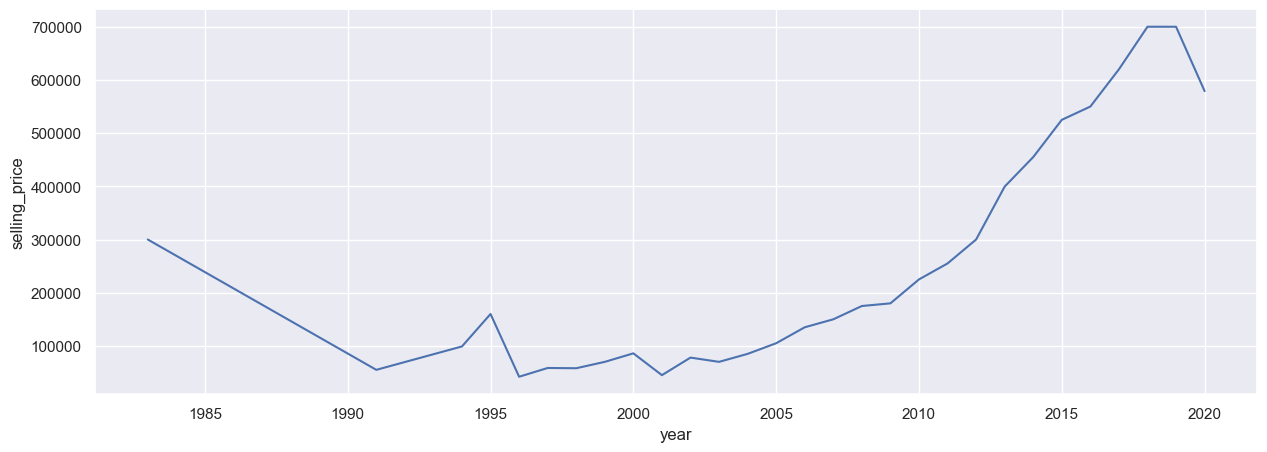

In [85]:
sns.lineplot(df_train.groupby('year')['selling_price'].median());

Стоимость на автомобили в последние годы находится на пике. Приблизительно с 2003-2004 годов начинается стабильный рост, который прервался только около $2018$ г., после чего началось падение.

Помимо этого, можно рассмотреть зависимость признака `selling_price` от "бонусных" признаков `torque` и `max_torque_rpm`. 

<Axes: xlabel='torque_nm', ylabel='selling_price'>

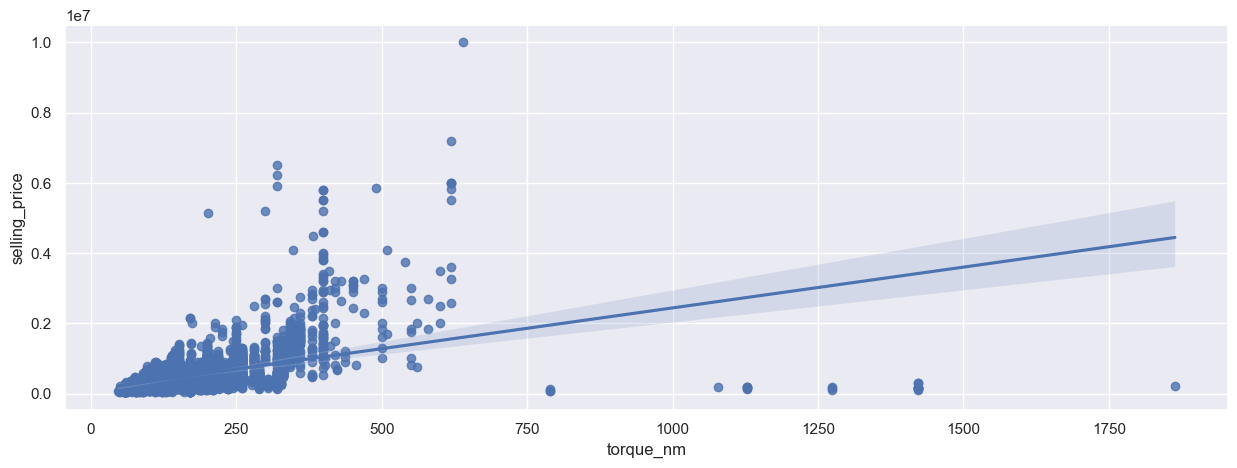

In [88]:
sns.regplot(data=df_train, x='torque_nm', y='selling_price')

Здесь видно, что есть неплохая зависимость между `torque_nm` и `selling_price`. То есть метрика должна улучшиться после добавления этого признака.

In [90]:
sns.regplot(data=df_train, x='max_torque_rpm', y='selling_price')

<Axes: xlabel='max_torque_rpm', ylabel='selling_price'>

Здесь зависимость не кажется значимой.

В обоих признаках есть сильные выбросы. Если их удалить, то зависимость должна улучшиться.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [94]:
# Создаем копию только с количественными признаками
df_train_num = df_train.select_dtypes(exclude='object').copy()
df_test_num = df_test.select_dtypes(exclude='object').copy()

y_train = df_train_num['selling_price'] # your code here
X_train_num = df_train_num.drop(['selling_price'], axis=1) # your code here

y_test = df_test_num['selling_price'] # your code here
X_test_num = df_test_num.drop(['selling_price'], axis=1)  # your code here

In [95]:
# Оставил torque
# assert X_train.shape == (5840, 6)

In [96]:
# Оставил torque
# assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

Создам отдельную функцию для расчета метрик сейчас и вдальнейшем.

In [99]:
def metrics(fitted_model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import r2_score, mean_squared_error as MSE
    from sklearn.metrics import root_mean_squared_error as RMSE
    
    y_pred_train = fitted_model.predict(X_train)
    y_pred_test = fitted_model.predict(X_test)


    r2_train, mse_train, rmse_train = r2_score(y_train, y_pred_train), MSE(y_train, y_pred_train), RMSE(y_train, y_pred_train)
    r2_test, mse_test, rmse_test = r2_score(y_test, y_pred_test), MSE(y_test, y_pred_test), RMSE(y_test, y_pred_test)

    return pd.DataFrame([[r2_train, mse_train, rmse_train], [r2_test, mse_test, rmse_test]],
                     index=['train', 'test'],
                     columns=['r2', 'mse', 'rmse']).round(3)
    

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
# Дополнительно, для лушей интерпретации
from sklearn.metrics import root_mean_squared_error as RMSE

# your code here
lr = LinearRegression()
lr.fit(X_train_num, y_train)

metrics(lr, X_train_num, X_test_num, y_train, y_test)

r2           mse        rmse
train  0.601  1.143422e+11  338145.282
test   0.600  2.296995e+11  479269.710

Коэффициент детерминации достаточно низок (около $0,6$). Это достаточно плохой результат. Также корень из MSE достаточно высокий, т.е. модель ошибается в среднем более чем на $470000$ единиц. В целом модель недообучена, т.е. смещение слишком велико.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [103]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_num = pd.DataFrame(scaler.transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)

In [104]:
# Не было написано, что нужно обучать модель еще раз, но я обучу, чтобы выполнить следующий пункт
# your code here
lr = LinearRegression()
lr.fit(X_train_num, y_train)

metrics(lr, X_train_num, X_test_num, y_train, y_test)

r2           mse        rmse
train  0.601  1.143422e+11  338145.282
test   0.600  2.296995e+11  479269.710

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [106]:
coefficients_lr = pd.concat([pd.DataFrame(X_train_num.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients_lr.columns = ['feature', 'weights']
coefficients_lr = coefficients_lr.sort_values(by='weights', key=abs, ascending=False).round(3)
coefficients_lr

feature     weights
4       max_power  328528.451
0            year  165843.163
6  max_torque_rpm  -58670.402
1       km_driven  -48921.076
5           seats  -30486.354
3          engine   22375.496
2         mileage   -8613.713
7       torque_nm    8203.440

Самым важным (информативным) признаком окалазся `max_power`. Затем идут `year`, `max_torque_rpm`. 

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [109]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso(random_state=RANDOM_STATE)
lasso.fit(X_train_num, y_train)

metrics(lasso, X_train_num, X_test_num, y_train, y_test)

r2           mse        rmse
train  0.601  1.143422e+11  338145.282
test   0.600  2.297002e+11  479270.457

Метрики почти не изменились, качество не улучшилось.

In [111]:
# your code here
coefficients_lasso = pd.concat([pd.DataFrame(X_train_num.columns), pd.DataFrame(np.transpose(lasso.coef_))], axis=1)
coefficients_lasso.columns = ['feature', 'weights']
coefficients_lasso.sort_values(by='weights', key=abs, ascending=False).round(3)

feature     weights
4       max_power  328529.402
0            year  165841.209
6  max_torque_rpm  -58668.278
1       km_driven  -48920.158
5           seats  -30482.800
3          engine   22374.180
2         mileage   -8610.579
7       torque_nm    8202.786

L1-регуляризация с параметрами по умолчанию не занулила никаких весов. Скорее всего, это произошло потому, что коэффициент регуляризации был слишком маленьким. Возможно, нужно увеличить значение `alpha`. Если сильно увеличить коэффициент `alpha` , то коэффициетны начнут зануляться (проверял).

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [114]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=RANDOM_STATE)

# your code here
param_grid = {'alpha': range(1, 101)}

grid = GridSearchCV(lasso, param_grid, cv=10, scoring='r2')
grid.fit(X_train_num, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42),
             param_grid={'alpha': range(1, 101)}, scoring='r2')

In [115]:
lasso_best = grid.best_estimator_

print(f'lasso best score - {grid.best_score_}')

lasso_best.fit(X_train_num, y_train)

metrics(lasso_best, X_train_num, X_test_num, y_train, y_test)

lasso best score - 0.574794403627784


r2           mse        rmse
train  0.601  1.143424e+11  338145.484
test   0.600  2.297736e+11  479347.052

In [116]:
lasso_best

Lasso(alpha=100, random_state=42)

In [117]:
# your code here
coefficients_lasso = pd.concat([pd.DataFrame(X_train_num.columns), pd.DataFrame(np.transpose(lasso_best.coef_))], axis=1)
coefficients_lasso.columns = ['feature', 'weights']
coefficients_lasso.sort_values(by='weights', key=abs, ascending=False).round(3)

feature     weights
4       max_power  328667.496
0            year  165621.133
6  max_torque_rpm  -58460.145
1       km_driven  -48826.786
5           seats  -30087.442
3          engine   22176.330
2         mileage   -8282.210
7       torque_nm    8140.573

Ответы на вопросы:

1) Если у нас $10$ фолдов, то для каждой комбинации гипперпараметров будет обучено 10 моделей. Всего комбинаций гиперпараметров $100$. Таким образом, всего будет обучено $10 \cdot 100 = 1000$ моделей.

2) У лучшей из перебранных моделе коэффициент регуляризации равен 100. Веса не занулились. Чтобы занулились, нужно увеличить коэффициент регуляризации.

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [120]:
from sklearn.linear_model import ElasticNet

# your code here
elastic_net = ElasticNet(random_state=RANDOM_STATE)

param_grid = {'alpha': np.arange(1, 101, 1), 'l1_ratio': np.arange(0.1, 0.8, 0.1)}

grid = GridSearchCV(elastic_net, param_grid, cv=10, scoring='r2')
grid.fit(X_train_num, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])},
             scoring='r2')

In [121]:
elastic_best = grid.best_estimator_

print('Best score на кросс-валидации -', grid.best_score_)

elastic_best.fit(X_train_num, y_train)

metrics(elastic_best, X_train_num, X_test_num, y_train, y_test)

Best score на кросс-валидации - 0.5746168147535904


r2           mse        rmse
train  0.575  1.216963e+11  348849.948
test   0.538  2.654720e+11  515239.788

In [122]:
elastic_best

ElasticNet(alpha=1, l1_ratio=0.7000000000000001, random_state=42)

Ответы на вопросы:
1) Грид-сёрчу пришлось обучать: $10 \cdot 100 \cdot 7 = 7000$ моделей.
2) Лучшей модели соответствуют гиперпараметры `alpha=1`, `l1_ratio=0.7`

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

In [126]:
df_train['name'].nunique()

1924

Количество уникальных категорий в этом столбце слишком велико. Но я в качестве бонуса не удалю этот признак, а обработаю.

In [128]:
# your code here
# df_train = df_train.drop(['name'], axis=1)
# df_test = df_test.drop(['name'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления

Чтобы обработать этот признак, можно выделить из него:
1. фирму машины;
2. модель машины.

Модель машины выделить достаточно сложно, и он создает много уникальных значений. Лучше оставить только фирму. Признак должен значительно повысить качество модели.

In [131]:
car_firm = df_train['name'].apply(lambda x: x.split()[0])
print(f'Количество уникальных значений - {car_firm.nunique()}')

Количество уникальных значений - 30


In [132]:
X_train = df_train.drop(['selling_price'], axis=1) 
X_test = df_test.drop(['selling_price'], axis=1)

# Заменим признак name
X_train['name'] = car_firm
X_test['name'] = car_firm

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [133]:
# assert X_train_cat.shape == (5840, 10)
# По-другому называл переменную, плюс не удалял name, а преобразовал

In [134]:
# X_train_cat.describe(include='object')
X_train.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [136]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import ColumnTransformer

num_features = list(X_train.drop(['seats'], axis=1).select_dtypes(exclude='object').columns)
text_cat_features = list(X_train.select_dtypes(include='object').columns) +['seats']

preprocessor = ColumnTransformer([('scaler', StandardScaler(), num_features), 
                                  ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), text_cat_features)])


# your code here
X_train_transf = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test_transf = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [137]:
X_train_transf.head(2)

scaler__year  scaler__km_driven  scaler__mileage  scaler__engine  \
0       0.13957           1.191152         0.996413       -0.373643   
1       0.13957           0.766619         0.429384        0.141162   

   scaler__max_power  scaler__max_torque_rpm  scaler__torque_nm  \
0          -0.439701               -1.148323           0.133723   
1           0.493387               -0.599391           0.693923   

   encoder__name_Audi  encoder__name_BMW  encoder__name_Chevrolet  ...  \
0                 0.0                0.0                      0.0  ...   
1                 0.0                0.0                      0.0  ...   

   encoder__owner_Test Drive Car  encoder__owner_Third Owner  \
0                            0.0                         0.0   
1                            0.0                         0.0   

   encoder__seats_4  encoder__seats_5  encoder__seats_6  encoder__seats_7  \
0               0.0               1.0               0.0               0.0   
1               0.0               1.0               0.0               0.0   

   encoder__seats_8  encoder__seats_9  encoder__seats_10  encoder__seats_14  
0               0.0               0.0                0.0                0.0  
1               0.0               0.0                0.0                0.0  

[2 rows x 54 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [139]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state=RANDOM_STATE)

# your code here
param_grid = {'alpha': range(200, 501, 5)}

grid = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')
grid.fit(X_train_transf, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid={'alpha': range(200, 501, 5)}, scoring='r2')

In [140]:
ridge_best = grid.best_estimator_
ridge_best

Ridge(alpha=200, random_state=42)

In [141]:
ridge_best.fit(X_train_transf, y_train)
print(f'Best_score - {grid.best_score_}')
metrics(ridge_best, X_train_transf, X_test_transf, y_train, y_test)

Best_score - 0.6536194868313923


r2           mse        rmse
train  0.673  9.381070e+10  306285.328
test   0.625  2.156027e+11  464330.402

В результате добавления категориальных признаков удалось улучшить качество модели. Теперь метрика $R^2$ превышет $0,62$ на тесте.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

В заданиях не говорилось обучать все модели заново на датасете с категориальными признаками, поэтому я оставлю все, как есть.

In [145]:
def business_metric(y_true, y_pred):
    # Считаем отличие в процентах
    result = (y_pred - y_true).abs() / y_true * 100

    # Добавляем условие "не более чем на 10%" и считаем долю
    result = (result <= 10).sum() / y_true.shape[0]

    # Возвращаем результат
    return result

In [146]:
y_pred_lr = lr.predict(X_test_num)
y_pred_lasso = lasso_best.predict(X_test_num)
y_pred_elastic = elastic_best.predict(X_test_num)
y_pred_ridge = ridge_best.predict(X_test_transf)


pd.DataFrame([business_metric(y_test, y_pred_lr), business_metric(y_test, y_pred_lasso), business_metric(y_test, y_pred_elastic), business_metric(y_test, y_pred_ridge)],
            index=['linear_reg', 'lasso', 'elastic', 'ridge'], columns=['business_metric']).T

linear_reg  lasso  elastic  ridge
business_metric       0.244  0.243    0.271  0.204

`Your answer here`

На данный момент лучше всего задачу решает `elastic`-регрессия, но в целом модели недообучены и имеют низкую предсказательную способность. 

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [150]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Чтобы реализовать сервис на FastAPI, для начала нужно сделать пайплайн, включающий обработку признаков и обучение модели. Затем нужно сериализовать эту модель, чтобы позже загрузить её в отдельном файле с приложением.

In [153]:
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [154]:
num_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm', 'torque_nm']
cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']


num_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([('scaler', StandardScaler(), num_features), 
                                  ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_features)])

final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', elastic_best)
])

In [155]:
print('Метрика итоговой модели в сервисе -',
     cross_val_score(final_pipe, X_train, y_train, scoring='r2', cv=5).mean()
)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Метрика итоговой модели в сервисе - 0.6006482175995369


C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [156]:
# Обучим эту регрессию на всех данных, а не только на количественных
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power',
                                                   'max_torque_rpm',
                                                   'torque_nm']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission', 'owner',
                                                   'seats'])])),
                ('model',
                 ElasticNet(alpha=1, l1_ratio=0.7000000000000001,
                            random_state=42))])

In [157]:
# Сохраним модель
model_name = 'elastic_regressor.pkl'

with open(model_name, 'wb') as f:
    pickle.dump(final_pipe, f)

In [158]:
# Функция для первичной обработке данных в приложении
def initial_preprocessing(data):

    # Функция для выявления единиц измерения
    def torque_cat(x):
        if not isinstance(x, str):
            return np.nan
        elif 'nm' in x:
            return 'nm'
        elif 'kgm' in x:
            return 'kgm'
        else:
            return 'unknown'


    # Функция для выделения torque
    def get_torque(x):
        if isinstance(x, list):
            return x[0]
        else:
            return x

    # Функция выделения rpm
    def get_max_rpm(x):
        if isinstance(x, list):
            if len(x) > 1:
                el = x[1]
                if '-' in el:
                    return el.split('-')[1]
                return el
            elif len(x) == 1:
                return np.nan
        else:
            return x
            
    # Функция для конвертации torque из kgm в nm
    def convert_torque(row):
        G = 9.80665
        
        if row['torque_cat'] == 'kgm':
            return row['torque'] * G
    
        else:
            return row['torque']
    

    # Убираем единицы измерения, приводим к float
    data['mileage'] = data['mileage'].str.replace('[kmpl|km/kg]', '', regex=True).astype('float')
    data['engine'] = data['engine'].str.replace('CC', '').astype('float')
    data['max_power'] = data['max_power'].str.replace('bhp', '').replace('^\s*$', np.nan, regex=True).astype('float')


    # Преобразовываем torque
    # Приведем в нижний регистр
    data['torque'] = data['torque'].str.lower()
    # Запонминаем единицы измерения для будущей переменной torque
    data['torque_cat'] = data['torque'].apply(torque_cat)
    
    # Паттерн для разделения данных
    pattern = r'(?:nm@|kgm at|@|nm at|/|nm)'
    
    # Создаем новые признаки в тренировочных данных
    data['torque'] = data['torque'].str.replace('\(.*\)', '', regex=True).str.strip(' rpm')\
                                           .str.replace('~', '-')\
                                           .str.replace(',', '')\
                                           .str.split(pattern, regex=True)
    
    data['max_torque_rpm'] = data['torque'].apply(get_max_rpm).str.extract(r'(\d+)', expand=False).astype('float')
    data['torque_new'] = data['torque'].apply(get_torque).str.replace('[a-zA-Z]', '', regex=True).astype('float')

    data = data.drop(['torque'], axis=1).rename({'torque_new': 'torque'}, axis=1)
    

    # Конвертируем kgm в трейне
    data['torque'] = data.apply(convert_torque, axis=1)
    data = data.rename({'torque': 'torque_nm'}, axis=1)
    data = data.drop(['torque_cat'], axis=1)

    # Преобразовываем название машины
    data['name'] = data['name'].apply(lambda x: x.split()[0])

    return data 

<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\('
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\('
C:\Users\User\AppData\Local\Temp\ipykernel_24772\3057654865.py:50: SyntaxWarning: invalid escape sequence '\s'
  data['max_power'] = data['max_power'].str.replace('bhp', '').replace('^\s*$', np.nan, regex=True).astype('float')
C:\Users\User\AppData\Local\Temp\ipykernel_24772\3057654865.py:63: SyntaxWarning: invalid escape sequence '\('
  data['torque'] = data['torque'].str.replace('\(.*\)', '', regex=True).str.strip(' rpm')\


In [159]:
result = pd.concat([X_test, pd.Series(final_pipe.predict(X_test))], axis=1)
result.columns = columns = list(X_test.columns) + ['predictions']

In [160]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

inp =\
{
  "name": "Maruti Swift Dzire VDI",
  "year": 2014,
  "km_driven": 145500,
  "fuel": "Diesel",
  "seller_type": "Individual",
  "transmission": "Manual",
  "owner": "First Owner",
  "mileage": "23.4 kmpl",
  "engine": "1248 CC",
  "max_power": "74 bhp",
  "torque": "190Nm@ 2000rpm",
  "seats": 5.0
}

inp

{'name': 'Maruti Swift Dzire VDI',
 'year': 2014,
 'km_driven': 145500,
 'fuel': 'Diesel',
 'seller_type': 'Individual',
 'transmission': 'Manual',
 'owner': 'First Owner',
 'mileage': '23.4 kmpl',
 'engine': '1248 CC',
 'max_power': '74 bhp',
 'torque': '190Nm@ 2000rpm',
 'seats': 5.0}

In [161]:
df_train.drop(['selling_price'], axis=1).iloc[:10, :].to_csv('test_service.csv')
df_train.drop(['selling_price'], axis=1).iloc[:10, :]

name  year  km_driven    fuel seller_type  \
0                Maruti Swift Dzire VDI  2014     145500  Diesel  Individual   
1          Skoda Rapid 1.5 TDI Ambition  2014     120000  Diesel  Individual   
2             Hyundai i20 Sportz Diesel  2010     127000  Diesel  Individual   
3                Maruti Swift VXI BSIII  2007     120000  Petrol  Individual   
4         Hyundai Xcent 1.2 VTVT E Plus  2017      45000  Petrol  Individual   
5          Maruti Wagon R LXI DUO BSIII  2007     175000     LPG  Individual   
6                    Maruti 800 DX BSII  2001       5000  Petrol  Individual   
7                      Toyota Etios VXD  2011      90000  Diesel  Individual   
8  Ford Figo Diesel Celebration Edition  2013     169000  Diesel  Individual   
9       Renault Duster 110PS Diesel RxL  2014      68000  Diesel  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   
5       Manual   First Owner  17.3 km/kg  1061 CC    57.5 bhp   
6       Manual  Second Owner   16.1 kmpl   796 CC      37 bhp   
7       Manual   First Owner  23.59 kmpl  1364 CC    67.1 bhp   
8       Manual   First Owner   20.0 kmpl  1399 CC    68.1 bhp   
9       Manual  Second Owner  19.01 kmpl  1461 CC  108.45 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0  
5      7.8@ 4,500(kgm@ rpm)    5.0  
6             59Nm@ 2500rpm    4.0  
7       170Nm@ 1800-2400rpm    5.0  
8            160Nm@ 2000rpm    5.0  
9            248Nm@ 2250rpm    5.0

In [162]:
pd.read_csv('response.csv').drop(['Unnamed: 0'], axis=1)

name  year  km_driven    fuel seller_type transmission         owner  \
0   Maruti  2014     145500  Diesel  Individual       Manual   First Owner   
1    Skoda  2014     120000  Diesel  Individual       Manual  Second Owner   
2  Hyundai  2010     127000  Diesel  Individual       Manual   First Owner   
3   Maruti  2007     120000  Petrol  Individual       Manual   First Owner   
4  Hyundai  2017      45000  Petrol  Individual       Manual   First Owner   
5   Maruti  2007     175000     LPG  Individual       Manual   First Owner   
6   Maruti  2001       5000  Petrol  Individual       Manual  Second Owner   
7   Toyota  2011      90000  Diesel  Individual       Manual   First Owner   
8     Ford  2013     169000  Diesel  Individual       Manual   First Owner   
9  Renault  2014      68000  Diesel  Individual       Manual  Second Owner   

   mileage  engine  max_power  seats  max_torque_rpm   torque_nm  \
0    23.40  1248.0      74.00    5.0          2000.0  190.000000   
1    21.14  1498.0     103.52    5.0          2500.0  250.000000   
2    23.00  1396.0      90.00    5.0          2750.0  219.668960   
3    16.10  1298.0      88.20    5.0          4500.0  112.776475   
4    20.14  1197.0      81.86    5.0          4000.0  113.750000   
5    17.30  1061.0      57.50    5.0          4500.0   76.491870   
6    16.10   796.0      37.00    4.0          2500.0   59.000000   
7    23.59  1364.0      67.10    5.0          2400.0  170.000000   
8    20.00  1399.0      68.10    5.0          2000.0  160.000000   
9    19.01  1461.0     108.45    5.0          2250.0  248.000000   

   selling_price_pred  
0       434385.884320  
1       633772.678047  
2       406043.444588  
3       215719.626189  
4       520614.143940  
5       -68514.342523  
6      -246123.663306  
7       337431.294476  
8       312955.571920  
9       705555.385718

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Предположу, что котофей принадлежит @sabrina_sadiekh